In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=12)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

In [2]:
# Load data for nomad:
h5f = h5py.File("model_outputs/nomad.h5", "r")
nomad_error_test = h5f["error_test"][:]
nomad_s_pred = h5f["s_pred"][:]
nomad_outputs_test = h5f["outputs_test"][:]
h5f.close()

# load data for deeponet
h5f = h5py.File("model_outputs/deeponet.h5", "r")
deeponet_error_test = h5f["error_test"][:]
deeponet_s_pred = h5f["s_pred"][:]
deeponet_outputs_test = h5f["outputs_test"][:]
h5f.close()

# load data for fno:
h5f = h5py.File("model_outputs/fno1d.h5", "r")
fno_error_test = h5f["error_test"][:]
fno_s_pred = h5f["s_pred"][:]
fno_outputs_test = h5f["outputs_test"][:]
h5f.close()

# load data for cvit:
h5f = h5py.File("model_outputs/cvit.h5", "r")
cvit_error_test = h5f["error_test"][:]
cvit_s_pred = h5f["s_pred"][:]
cvit_outputs_test = h5f["outputs_test"][:]
h5f.close()

In [3]:
def tvd(f, g, dx):
    df = np.abs(np.diff(f, axis=1))
    dg = np.abs(np.diff(g, axis=1))

    tvd = np.sum(np.abs(df - dg), axis=1) * dx
    return tvd

In [4]:
nomad_tvd = tvd(nomad_outputs_test, nomad_s_pred, 1/199)
deeponet_tvd = tvd(deeponet_outputs_test, deeponet_s_pred, 1/199)
fno_tvd = tvd(fno_outputs_test, fno_s_pred, 1/199)
cvit_tvd = tvd(cvit_outputs_test, cvit_s_pred, 1/199)

In [5]:
print("Using Relative L2 Error")
print("nomad: mean: {}, median: {}, max: {}, min: {}".format(
    np.mean(nomad_error_test), np.median(nomad_error_test), np.max(nomad_error_test), np.min(nomad_error_test)))
print("deeponet: mean: {}, median: {}, max: {}, min: {}".format(
    np.mean(deeponet_error_test), np.median(deeponet_error_test), np.max(deeponet_error_test), np.min(deeponet_error_test)))
print("fno: mean: {}, median: {}, max: {}, min: {}".format(
    np.mean(fno_error_test), np.median(fno_error_test), np.max(fno_error_test), np.min(fno_error_test)))
print("cvit: mean: {}, median: {}, max: {}, min: {}".format(
    np.mean(cvit_error_test), np.median(cvit_error_test), np.max(cvit_error_test), np.min(cvit_error_test)))

print("Using TVD")
print("nomad: mean: {}, median: {}, max: {}, min: {}".format(
    np.mean(nomad_tvd), np.median(nomad_tvd), np.max(nomad_tvd), np.min(nomad_tvd)))
print("deeponet: mean: {}, median: {}, max: {}, min: {}".format(
    np.mean(deeponet_tvd), np.median(deeponet_tvd), np.max(deeponet_tvd), np.min(deeponet_tvd)))
print("fno: mean: {}, median: {}, max: {}, min: {}".format(
    np.mean(fno_tvd), np.median(fno_tvd), np.max(fno_tvd), np.min(fno_tvd)))
print("cvit: mean: {}, median: {}, max: {}, min: {}".format(
    np.mean(cvit_tvd), np.median(cvit_tvd), np.max(cvit_tvd), np.min(cvit_tvd)))

Using Relative L2 Error
nomad: mean: 0.1364184021949768, median: 0.11011247336864471, max: 0.6900298595428467, min: 0.04251999780535698
deeponet: mean: 0.1372460126876831, median: 0.12157735228538513, max: 0.39527538418769836, min: 0.09589368849992752
fno: mean: 0.13937468826770782, median: 0.1203111931681633, max: 0.5651684999465942, min: 0.097323939204216
cvit: mean: 0.11695419996976852, median: 0.10675136744976044, max: 0.35436227917671204, min: 0.0430770106613636
Using TVD
nomad: mean: 0.032786961644887924, median: 0.024657096713781357, max: 0.17410017549991608, min: 0.013776685111224651
deeponet: mean: 0.057477112859487534, median: 0.04548190161585808, max: 0.23245680332183838, min: 0.03529060259461403
fno: mean: 0.04084176942706108, median: 0.03105577453970909, max: 0.1919582039117813, min: 0.026619527488946915
cvit: mean: 0.03354311361908913, median: 0.02754734642803669, max: 0.15231794118881226, min: 0.01588469371199608


In [6]:
# Put the mean, median and max values using relL2 for all the models in table using pandas:
import pandas as pd
data = {
    "Model": ["NOMAD", "DeepONet", "FNO", "CViT"],
    "Mean": [np.mean(nomad_error_test), np.mean(deeponet_error_test), np.mean(fno_error_test), np.mean(cvit_error_test)],
    "Median": [np.median(nomad_error_test), np.median(deeponet_error_test), np.median(fno_error_test), np.median(cvit_error_test)],
    "Max": [np.max(nomad_error_test), np.max(deeponet_error_test), np.max(fno_error_test), np.max(cvit_error_test)],
}

df = pd.DataFrame(data)
df

,Model,Mean,Median,Max
0,NOMAD,0.136418,0.110112,0.690030
1,DeepONet,0.137246,0.121577,0.395275
2,FNO,0.139375,0.120311,0.565168
3,CViT,0.116954,0.106751,0.354362


In [7]:
# considering tvd instead:
data = {
    "Model": ["NOMAD", "DeepONet", "FNO", "CViT"],
    "Mean": [np.mean(nomad_tvd), np.mean(deeponet_tvd), np.mean(fno_tvd), np.mean(cvit_tvd)],
    "Median": [np.median(nomad_tvd), np.median(deeponet_tvd), np.median(fno_tvd), np.median(cvit_tvd)],
    "Max": [np.max(nomad_tvd), np.max(deeponet_tvd), np.max(fno_tvd), np.max(cvit_tvd)],
}

df = pd.DataFrame(data)
df

,Model,Mean,Median,Max
0,NOMAD,0.032787,0.024657,0.174100
1,DeepONet,0.057477,0.045482,0.232457
2,FNO,0.040842,0.031056,0.191958
3,CViT,0.033543,0.027547,0.152318


In [8]:
nomad_best_idx = np.argmin(nomad_tvd)
nomad_worst_idx = np.argmax(nomad_tvd)

deeponet_best_idx = np.argmin(deeponet_tvd)
deeponet_worst_idx = np.argmax(deeponet_tvd)

fno_best_idx = np.argmin(fno_tvd)
fno_worst_idx = np.argmax(fno_tvd)

cvit_best_idx = np.argmin(cvit_tvd)
cvit_worst_idx = np.argmax(cvit_tvd)

print("nomad: best: {}, worst: {}".format(nomad_best_idx, nomad_worst_idx))
print("deeponet: best: {}, worst: {}".format(deeponet_best_idx, deeponet_worst_idx))
print("fno: best: {}, worst: {}".format(fno_best_idx, fno_worst_idx))
print("cvit: best: {}, worst: {}".format(cvit_best_idx, cvit_worst_idx))

nomad: best: 7703, worst: 3617
deeponet: best: 3372, worst: 7811
fno: best: 8938, worst: 7811
cvit: best: 260, worst: 7811


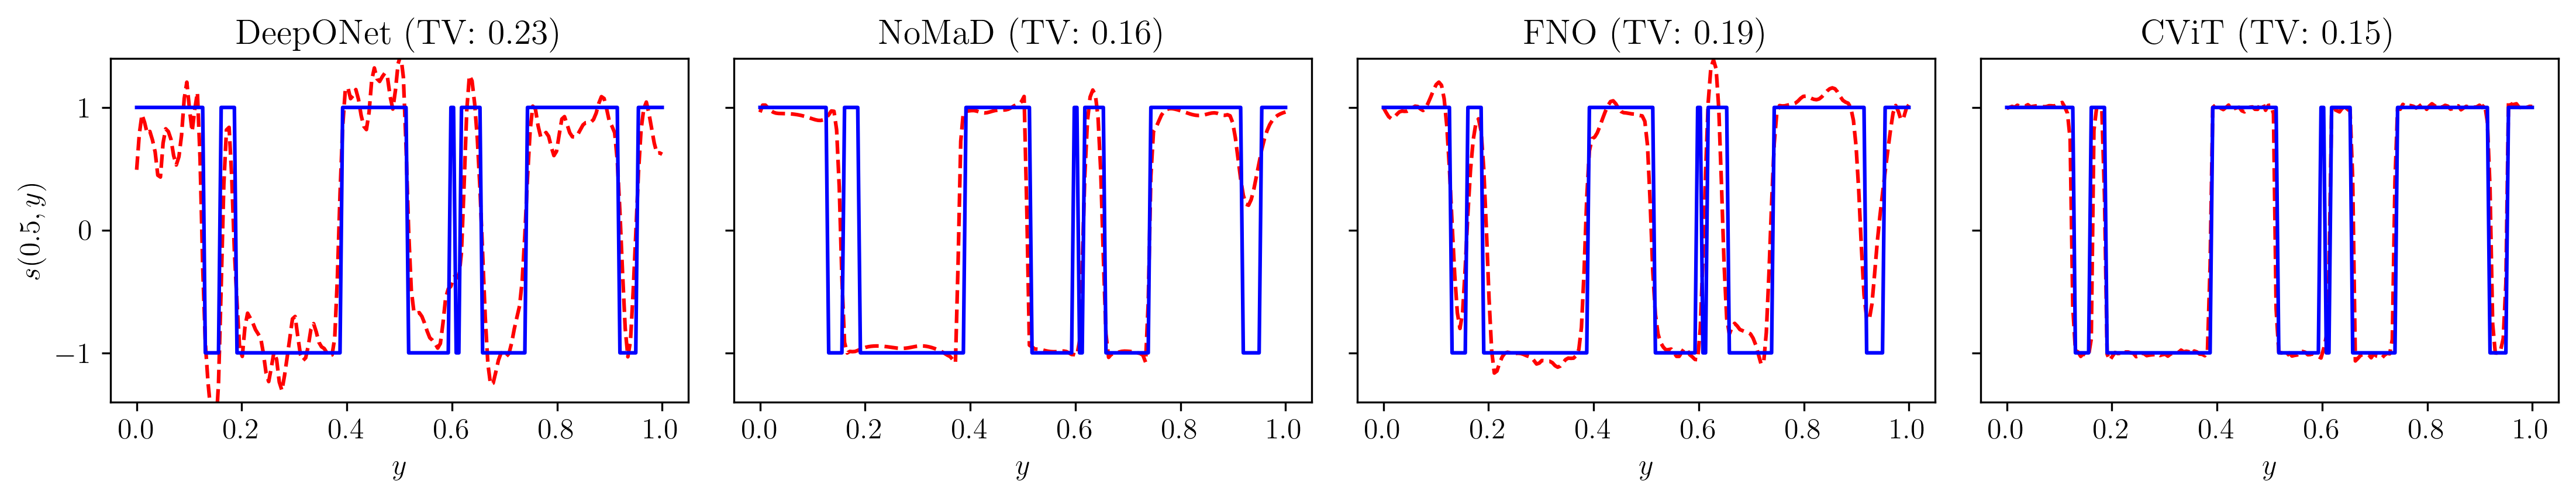

In [9]:
idx = 7811
x = np.linspace(0, 1, 200)

fig, ax = plt.subplots(1, 4, figsize = (15, 3), dpi = 300, sharex=True, sharey=True)
ax[0].plot(x, deeponet_s_pred[idx], 'r--')
ax[0].plot(x, deeponet_outputs_test[idx], 'b-')
ax[0].set_title("DeepONet (TV: {:.2f})".format(deeponet_tvd[idx]))
ax[0].set_xlabel("$y$")
ax[0].set_ylabel("$s(0.5, y)$")
ax[0].set_ylim([-1.4, 1.4])

ax[1].plot(x, nomad_s_pred[idx], 'r--')
ax[1].plot(x, nomad_outputs_test[idx], 'b-')
ax[1].set_title("NoMaD (TV: {:.2f})".format(nomad_tvd[idx]))
ax[1].set_xlabel("$y$")
ax[1].set_ylim([-1.4, 1.4])

ax[2].plot(x, fno_s_pred[idx], 'r--')
ax[2].plot(x, fno_outputs_test[idx], 'b-')
ax[2].set_title("FNO (TV: {:.2f})".format(fno_tvd[idx]))
ax[2].set_xlabel("$y$")
ax[2].set_ylim([-1.4, 1.4])

ax[3].plot(x, cvit_s_pred[idx], 'r--')
ax[3].plot(x, cvit_outputs_test[idx], 'b-')
ax[3].set_title("CViT (TV: {:.2f})".format(cvit_tvd[idx]))
ax[3].set_xlabel("$y$")
ax[3].set_ylim([-1.4, 1.4])

plt.tight_layout()